# 01wk-2: xxxx

최규빈  
2025-03-10

<a href="https://colab.research.google.com/github/guebin/DL2025/blob/main/posts/01wk-2.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상

In [2]:
# {{<video https://youtu.be/playlist?list=PLQqh36zP38-w2wjg7vQJHPP89wWGSq-MZ&si=J0lxSPEePOD-5BOL >}}

# 2. Imports

In [1]:
import torch
import matplotlib.pyplot as plt 

/home/cgb3/anaconda3/envs/stgcn-playground/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm

# 3. 회귀모형 – intro

## A. 아이스 아메리카노 (가짜자료)

`-` 카페주인인 박혜원씨는 온도와 아이스아메리카노 판매량이 관계가 있다는
것을 알았다. 구체적으로는

> “온도가 높아질 수록 (=날씨가 더울수록) 아이스아메리카노의 판매량이
> 증가”

한다는 사실을 알게 되었다. 이를 확인하기 위해서 아래와 같이 100개의
데이터를 모았다.

In [2]:
temp = [-2.4821, -2.3621, -1.9973, -1.6239, -1.4792, -1.4635, -1.4509, -1.4435,
        -1.3722, -1.3079, -1.1904, -1.1092, -1.1054, -1.0875, -0.9469, -0.9319,
        -0.8643, -0.7858, -0.7549, -0.7421, -0.6948, -0.6103, -0.5830, -0.5621,
        -0.5506, -0.5058, -0.4806, -0.4738, -0.4710, -0.4676, -0.3874, -0.3719,
        -0.3688, -0.3159, -0.2775, -0.2772, -0.2734, -0.2721, -0.2668, -0.2155,
        -0.2000, -0.1816, -0.1708, -0.1565, -0.1448, -0.1361, -0.1057, -0.0603,
        -0.0559, -0.0214,  0.0655,  0.0684,  0.1195,  0.1420,  0.1521,  0.1568,
         0.2646,  0.2656,  0.3157,  0.3220,  0.3461,  0.3984,  0.4190,  0.5443,
         0.5579,  0.5913,  0.6148,  0.6469,  0.6469,  0.6523,  0.6674,  0.7059,
         0.7141,  0.7822,  0.8154,  0.8668,  0.9291,  0.9804,  0.9853,  0.9941,
         1.0376,  1.0393,  1.0697,  1.1024,  1.1126,  1.1532,  1.2289,  1.3403,
         1.3494,  1.4279,  1.4994,  1.5031,  1.5437,  1.6789,  2.0832,  2.2444,
         2.3935,  2.6056,  2.6057,  2.6632]

In [3]:
sales= [-8.5420, -6.5767, -5.9496, -4.4794, -4.2516, -3.1326, -4.0239, -4.1862,
        -3.3403, -2.2027, -2.0262, -2.5619, -1.3353, -2.0466, -0.4664, -1.3513,
        -1.6472, -0.1089, -0.3071, -0.6299, -0.0438,  0.4163,  0.4166, -0.0943,
         0.2662,  0.4591,  0.8905,  0.8998,  0.6314,  1.3845,  0.8085,  1.2594,
         1.1211,  1.9232,  1.0619,  1.3552,  2.1161,  1.1437,  1.6245,  1.7639,
         1.6022,  1.7465,  0.9830,  1.7824,  2.1116,  2.8621,  2.1165,  1.5226,
         2.5572,  2.8361,  3.3956,  2.0679,  2.8140,  3.4852,  3.6059,  2.5966,
         2.8854,  3.9173,  3.6527,  4.1029,  4.3125,  3.4026,  3.2180,  4.5686,
         4.3772,  4.3075,  4.4895,  4.4827,  5.3170,  5.4987,  5.4632,  6.0328,
         5.2842,  5.0539,  5.4538,  6.0337,  5.7250,  5.7587,  6.2020,  6.5992,
         6.4621,  6.5140,  6.6846,  7.3497,  8.0909,  7.0794,  6.8667,  7.4229,
         7.2544,  7.1967,  9.5006,  9.0339,  7.4887,  9.0759, 11.0946, 10.3260,
        12.2665, 13.0983, 12.5468, 13.8340]

여기에서 `temp`는 평균기온이고, `sales`는 아이스아메리카노 판매량이다.
평균기온과 판매량의 그래프를 그려보면 아래와 같다.

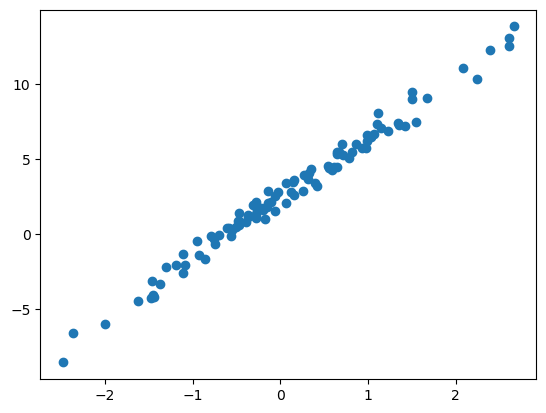

In [4]:
plt.plot(temp,sales,'o')

오늘 바깥의 온도는 0.5도 이다. 아이스 아메라카노를 몇잔정도 만들어 두면
좋을까?

## B. 가짜자료를 만든 방법

`-` 방법1:
$y_i= w_0+w_1 x_i +\epsilon_i = 2.5 + 4x_i +\epsilon_i, \quad i=1,2,\dots,n$

In [34]:
torch.manual_seed(43052)
x,_ = torch.randn(100).sort()
eps = torch.randn(100)*0.5
y = 2.5 + 4*x + eps 

In [35]:
x[:5], y[:5]

`-` 방법2: ${\bf y}={\bf X}{\bf W} +\boldsymbol{\epsilon}$

-   ${\bf y}=\begin{bmatrix} y_1 \\ y_2 \\ \dots \\ y_n\end{bmatrix}, \quad {\bf X}=\begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \dots \\ 1 & x_n\end{bmatrix}, \quad {\bf W}=\begin{bmatrix} 2.5 \\ 4 \end{bmatrix}, \quad \boldsymbol{\epsilon}= \begin{bmatrix} \epsilon_1 \\ \dots \\ \epsilon_n\end{bmatrix}$

In [47]:
X = torch.stack([torch.ones(100),x],axis=1)
W = torch.tensor([[2.5],[4.0]])
y = X@W + eps.reshape(100,1)

In [48]:
X[:5,:], y[:5,:]

`-` ture와 observed data를 동시에 시각화

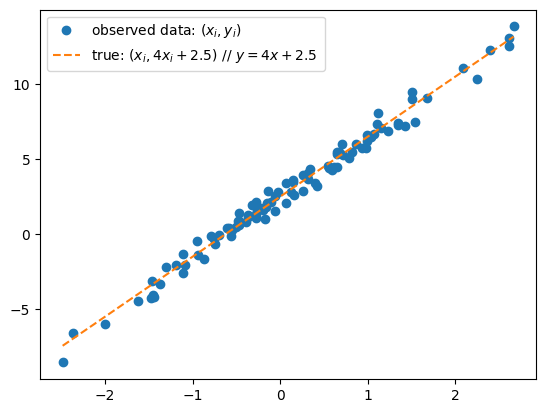

In [82]:
plt.plot(x,y,'o',label=r"observed data: $(x_i,y_i)$")
plt.plot(x,2.5+4*x,'--',label=r"true: $(x_i, 4x_i+2.5)$ // $y=4x+2.5$ ")
plt.legend()

## C. 회귀분석이란?

`-` 관측한 자료 $(x_i,y_i)$ 가 있음 $\to$ 우리는 $(x_i,y_i)$의 관계를
파악하여 새로운 $x$가 왔을때 그것에 대한 예측값(predicted value)
$\hat{y}$을 알아내는 법칙을 알고 싶음 $\to$ 관계를 파악하기 위해서
$(x_i, y_i)$의 산점도를 그려보니 $x_i$와 $y_i$는 선형성을 가지고 있다는
것이 파악됨 $\to$ 오차항이 독립이고 어쩌고 저쩌고… $\to$ 하여튼
$(x_i,y_i)$ 를 **“적당히 잘 관통하는”** 어떠한 하나의 추세선을 잘
추정하면 된다.

`-` 회귀분석이란 산점도를 보고 적당한 추세선을 찾는 것이다. 좀 더
정확하게 말하면 $(x_1,y_1) \dots (x_n,y_n)$ 으로
$\begin{bmatrix} \hat{w}_0 \\ \hat{w}_1 \end{bmatrix}$ 를 최대한
$\begin{bmatrix} 2.5 \\ 4 \end{bmatrix}$와 비슷하게 찾는 것.

-   given data : $\big\{(x_i,y_i) \big\}_{i=1}^{n}$

-   parameter: ${\bf W}=\begin{bmatrix} w_0 \\ w_1 \end{bmatrix}$

-   estimated parameter:
    ${\bf \hat{W}}=\begin{bmatrix} \hat{w}_0 \\ \hat{w}_1 \end{bmatrix}$

`-` 더 쉽게 말하면 아래의 그림을 보고 **“적당한”** 추세선을 찾는 것이다.

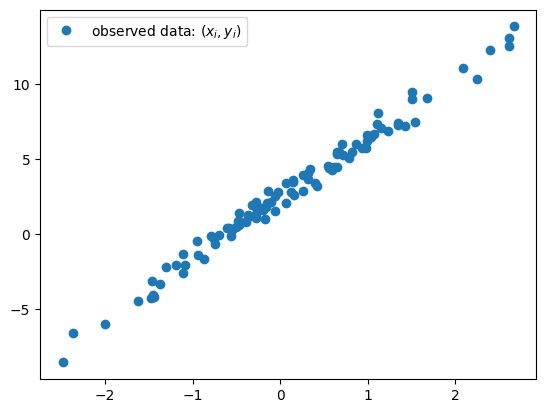

In [83]:
plt.plot(x,y,'o',label=r"observed data: $(x_i,y_i)$")
plt.legend()

# 4. 손실함수

`# 예제1` – $(\hat{w}_0,\hat{w}_1)=(-5,10)$을 선택하여 선을 그려보고
적당한지 판단해보자

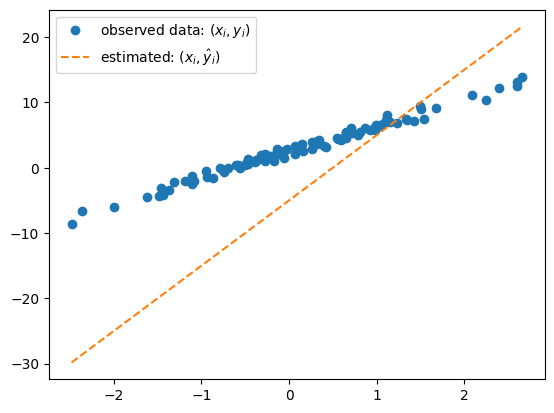

In [79]:
plt.plot(x,y,'o',label=r"observed data: $(x_i,y_i)$") 
#plt.plot(x,-5+10*x,'--')
What = torch.tensor([[-5.0],[10.0]])
plt.plot(x,X@What,'--',label=r"estimated: $(x_i,\hat{y}_i)$")
plt.legend()

`#`

`# 예제2` – $(\hat{w}_0,\hat{w}_1)=(2.5,3.5)$을 선택하여 선을 그려보고
적당한지 판단해보자

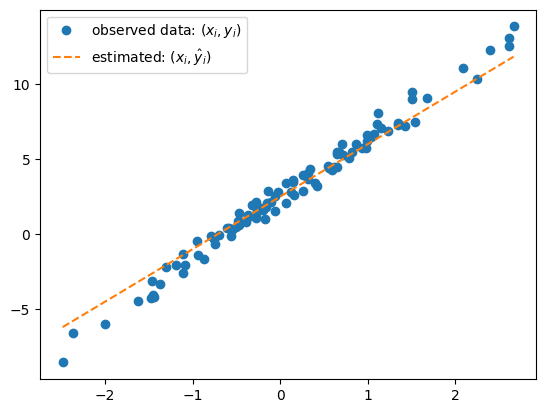

In [87]:
plt.plot(x,y,'o',label=r"observed data: $(x_i,y_i)$") 
#plt.plot(x,-5+10*x,'--')
What = torch.tensor([[2.5],[3.5]])
plt.plot(x,X@What,'--',label=r"estimated: $(x_i,\hat{y}_i)$")
plt.legend()

`#`

`# 예제3` – $(\hat{w}_0,\hat{w}_1)=(2.3,3.5)$을 선택하여 선을 그려보고
적당한지 판단해보자

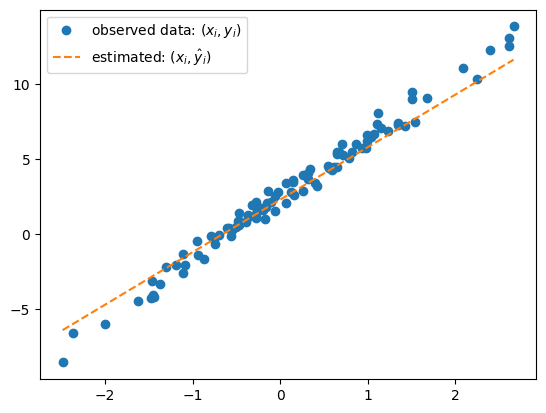

In [91]:
plt.plot(x,y,'o',label=r"observed data: $(x_i,y_i)$") 
#plt.plot(x,-5+10*x,'--')
What = torch.tensor([[2.3],[3.5]])
plt.plot(x,X@What,'--',label=r"estimated: $(x_i,\hat{y}_i)$")
plt.legend()

`#`

`# 예제4` – 예제2의 추세선과 예제3의 추세선 중 뭐가 더 적당한가?

`-` (고민) 왠지 예제2가 더 적당하다고 답해야할 것 같은데.. 육안으로
판단하기 까다롭다..

`-` 적당함을 수식화 할 수 없을까?

`-` “적당한 정도”를 판단하기 위한 장치: loss의 개념 도입

$loss = \sum_{i=1}^{n}(y_i- \hat{y}_i)^2 = \sum_{i=1}^{n}\big(y_i - (\hat{w}_0+\hat{w}_1x_i)\big)^2$

$=({\bf y}-\hat{\bf y})^\top({\bf y}-\hat{\bf y})=({\bf y}-{\bf X}\hat{\bf W})^\top({\bf y}-{\bf X}\hat{\bf W})$

`-` loss의 특징

-   $y_i \approx \hat{y}_i$ 일수록 loss 값이 작음
-   $y_i \approx \hat{y}_i$ 이 되도록 $(\hat{w}_0, \hat{w}_1)$을 작
    찍으면 loss 값이 작음
-   주황색 점선이 “적당할수록” loss 값이 작음 (그럼 우리 의도대로
    된거네?)

`-` loss를 써먹어보자.

In [98]:
What = torch.tensor([[2.5],[3.5]])
print(f"loss: {torch.sum((y - X@What)**2)}")

What = torch.tensor([[2.3],[3.5]])
print(f"loss: {torch.sum((y - X@What)**2)}")

loss: 55.074012756347656
loss: 59.3805046081543

In [101]:
What = torch.tensor([[2.5],[3.5]])
print(f"loss: {(y - X@What).T @ (y - X@What)}")

What = torch.tensor([[2.3],[3.5]])
print(f"loss: {(y - X@What).T @ (y - X@What)}")

loss: tensor([[55.0740]])
loss: tensor([[59.3805]])

`#`